In [1]:
import os

import torch
import clip
from PIL import Image
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
dir_media = "/mnt/research-data/main/twitter/media/"

In [3]:
in_text = [
    "Floodwaters have now subsided on the road from Inverell to our Dumaresq substation.\n\nThe site is accessible but remains closed today. Some minor road repairs are required on the access road into the site from the Bruxner highway.",
    "The waters are rising but the sun is out and the skies are blue on the other side of the bridge",
    "Bit of an update on #Moree flooding. 3pm Wed: Gwydir looking to Pally; back to town; town weir to south; looking north with main bridge at bottom of photo. A lot of water coming into Mehi from hills so hard to know what actual height will be"
]

in_images = [
    "ExShBSKUUAUYff0.jpg",
    "ExMjmk_VEAAiZhj.jpg",
    "ExOND50VkAIwHGB.jpg"
]

In [4]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"This is PyTorch on {device}")
model, preprocess = clip.load("ViT-B/32", device=device)

This is PyTorch on cpu


In [5]:
text = clip.tokenize(in_text).to(device)
images = torch.stack([ preprocess(Image.open(os.path.join(dir_media, filename))) for filename in in_images ]).to(device)
print("TEXT", text.shape)
print("IMAGES", images.shape)

TEXT torch.Size([3, 77])
IMAGES torch.Size([3, 3, 224, 224])


In [6]:
with torch.no_grad():
    image_features = model.encode_image(images)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(images, text)
    similarities = logits_per_image.softmax(dim=-1).cpu().numpy()

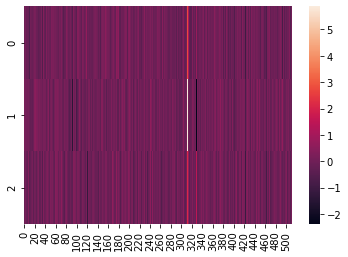

In [7]:
plot_heatmap_text = sns.heatmap(text_features)
plt.savefig("/tmp/clip-text-features.png", bbox_inches="tight")

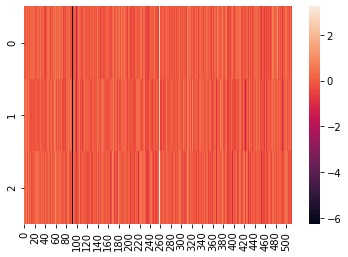

In [8]:
plot_heatmap_images = sns.heatmap(image_features)
plt.savefig("/tmp/clip-image-features.png", bbox_inches="tight")

[[0.9545743  0.02426469 0.02116101]
 [0.8919009  0.00527984 0.10281917]
 [0.09077321 0.00146314 0.9077637 ]]


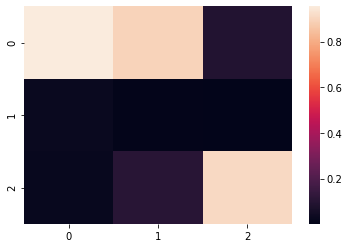

In [9]:
print(similarities)
plot_heatmap_similarities = sns.heatmap(np.transpose(similarities))
plt.savefig("/tmp/clip-similarities.png", bbox_inches="tight")